# Installation & Import

This tutorial covers connecting to and working with Amazon Web Services (AWS) S3 bucket. 

We have an AWS Open Data Registry sponsorship to build a neurochemical fast voltammetry database (which we call SeroDB).

See: https://aws.amazon.com/opendata/open-data-sponsorship-program/ and https://registry.opendata.aws/

First, a little bit about the database structure. The database is organized as an S3 'bucket': https://aws.amazon.com/s3/

We can fill the bucket with whatever data and datatypes we like. We have up to 5TB in size, with costs covered by AWS for 2 years (with renewal periods if needed). Even without sponsorship, the costs are rather minimal.

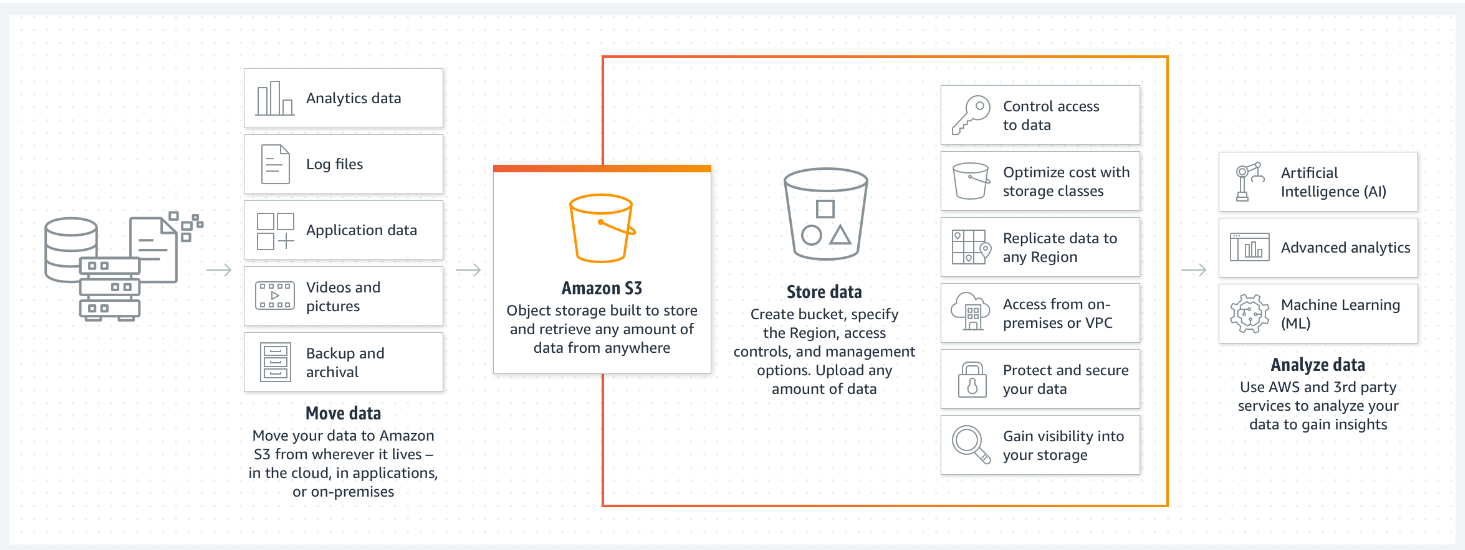

To communicate with that database from Python/Jupyter, we'll need the below packages:

In [1]:
!pip install boto3
!pip install awswrangler

     ---------------------------------------- 0.0/403.8 kB ? eta -:--:--
     ----------- -------------------------- 122.9/403.8 kB 2.4 MB/s eta 0:00:01
     ---------------------------- --------- 307.2/403.8 kB 2.7 MB/s eta 0:00:01
     -------------------------------------  399.4/403.8 kB 2.8 MB/s eta 0:00:01
     -------------------------------------- 403.8/403.8 kB 2.5 MB/s eta 0:00:00
     ---------------------------------------- 0.0/24.8 MB ? eta -:--:--
     ---------------------------------------- 0.1/24.8 MB 3.6 MB/s eta 0:00:07
     ---------------------------------------- 0.3/24.8 MB 3.2 MB/s eta 0:00:08
      --------------------------------------- 0.4/24.8 MB 3.0 MB/s eta 0:00:09
      --------------------------------------- 0.5/24.8 MB 2.6 MB/s eta 0:00:10
     - -------------------------------------- 0.6/24.8 MB 2.6 MB/s eta 0:00:10
     - -------------------------------------- 0.8/24.8 MB 2.7 MB/s eta 0:00:10
     - -------------------------------------- 0.9/24.8 MB 2.7

In [3]:
import boto3
import awswrangler as wr
import pandas as pd

# Amazon S3

To set up your credentials, you'll need to follow the steps from boto3: 
https://github.com/boto/boto3
    
To obtain your credentials, please send an email to serowaredb@gmail.com

Once connected, you should be able to view sero-db bucket and any others on your account.

In [4]:
# Let's use Amazon S3
s3 = boto3.resource('s3')

In [5]:
# Print out bucket names
for bucket in s3.buckets.all():
    print(bucket.name)

sagemaker-studio-590183703080-ijrd7l0s4pl
sagemaker-studio-590183703080-k9orugmutqp
sagemaker-studio-590183703080-mlr6jrj244h
sagemaker-studio-590183703080-qjnrtvhqone
sagemaker-us-east-2-590183703080
sagemaker-us-west-1-590183703080
sero-db


Now let's try to pull down and view some data thats on the bucket already.

In [6]:
s3 = boto3.client('s3')
s3.download_file('sero-db', 'demo/bo2wf1_20int_p.csv', 'mydata')

In [10]:
path1 = f"s3://sero-db/demo/bo2wf1_20int_p.csv"
path2 = f"s3://sero-db/demo/bo2wf1_20int_p.xlsx"

To extend the power of pandas dataframes to AWS, we'll use awswrangler as wr. 
See: https://aws-sdk-pandas.readthedocs.io/en/stable/

In [11]:
wr.s3.read_csv(path1)

,0(2),A
0,-258.715142,-258.392833
1,-258.715142,-258.392833
2,-258.392833,-258.070525
3,-258.070525,-258.715142
4,-258.392833,-258.392833


In [12]:
wr.s3.read_excel(path2)

,0(2),0(2).1,0(2).2,0(2).3,0(2).4,0(2).5,0(2).6,0(2).7,0(2).8,0(2).9,...,A.31,A.32,A.33,A.34,A.35,A.36,A.37,A.38,A.39,A.40
0,-258.715142,-259.037450,-258.070525,-258.392833,-258.070525,-258.392833,-258.070525,-258.715142,-258.392833,-259.037450,...,-258.392833,-258.392833,-258.070525,-258.070525,-258.392833,-258.070525,-258.392833,-259.037450,-258.070525,-258.392833
1,-258.715142,-258.070525,-258.715142,-258.392833,-257.425908,-258.392833,-257.748217,-258.070525,-258.392833,-257.748217,...,-258.392833,-258.392833,-258.392833,-258.715142,-259.037450,-258.392833,-258.392833,-258.392833,-258.070525,-258.392833
2,-258.392833,-258.715142,-258.392833,-258.392833,-258.392833,-258.392833,-258.715142,-258.392833,-258.070525,-258.392833,...,-258.070525,-258.715142,-259.037450,-258.392833,-258.715142,-257.748217,-258.070525,-259.037450,-258.715142,-258.070525
3,-258.070525,-257.748217,-258.070525,-258.392833,-258.392833,-258.070525,-258.715142,-258.392833,-258.715142,-259.037450,...,-257.748217,-258.392833,-259.037450,-257.748217,-258.715142,-258.070525,-258.715142,-259.037450,-258.392833,-258.715142
4,-258.392833,-258.070525,-258.715142,-258.392833,-257.425908,-258.392833,-258.070525,-258.392833,-258.715142,-258.070525,...,-258.070525,-257.748217,-258.392833,-258.715142,-258.392833,-258.392833,-258.392833,-258.715142,-258.715142,-258.392833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4695,-254.202824,-254.202824,-253.880515,-254.202824,-253.558207,-253.880515,-254.202824,-253.235899,-254.202824,-254.847441,...,-253.880515,-254.525132,-254.525132,-254.202824,-254.525132,-253.880515,-253.880515,-254.525132,-254.202824,-254.202824
4696,-254.202824,-253.880515,-254.525132,-253.880515,-253.558207,-253.558207,-253.880515,-254.202824,-254.202824,-253.558207,...,-253.880515,-254.202824,-254.525132,-254.202824,-254.202824,-254.202824,-253.880515,-254.525132,-254.202824,-254.525132
4697,-253.880515,-253.880515,-254.525132,-253.880515,-253.558207,-254.202824,-253.558207,-254.202824,-254.202824,-253.558207,...,-253.880515,-254.525132,-254.202824,-254.202824,-253.880515,-254.202824,-254.202824,-254.202824,-253.880515,-253.880515
4698,-253.880515,-253.880515,-253.880515,-253.235899,-253.235899,-253.880515,-253.880515,-254.202824,-253.235899,-253.880515,...,-253.880515,-253.880515,-253.880515,-253.558207,-253.558207,-253.880515,-254.525132,-254.525132,-253.880515,-254.202824


# Inspect Experiment Metadata 

Now we need to have a way of associating metadeta with all the data we upload to S3.

By metadata, we mean data about the data. As in, what type of electrode did you use? How long was it cut to? What waveform did you use? Buffer? And so on...

The more specific you are with the meta-data, the more people can narrow down a search across all data on SeroDB to curate custom datasets. 

To view what meta data is already associated: 

In [26]:
#credit: https://stackoverflow.com/questions/50271946/get-file-metadata-from-s3-using-python-boto

s3client = boto3.client('s3')

paginator = s3client.get_paginator('list_objects_v2')
page_iterator = paginator.paginate(Bucket='sero-db')
for bucket in page_iterator:
    for file in bucket['Contents']:
        print(file['Key'])
        try:
            metadata = s3client.head_object(Bucket='sero-db', Key=file['Key'])
            print(metadata['Metadata']['lab'])
        except:
            print("Failed {}".format(file['Key']))

06222022/electrode 119.4 bo3wf2_1.dat
Andrews
06222022/electrode 119_20int_p.xlsx
Andrews
demo/RPV_standards_schema.xlsx
Failed demo/RPV_standards_schema.xlsx
demo/bo2wf1_20int_p.csv
Failed demo/bo2wf1_20int_p.csv
demo/bo2wf1_20int_p.xlsx
Failed demo/bo2wf1_20int_p.xlsx
demo/bo3wf2_02152024_test.mat
Failed demo/bo3wf2_02152024_test.mat
demo/bo3wf2_02152024_train.mat
Failed demo/bo3wf2_02152024_train.mat
demo/bo3wf2_e119_pedotnafionCFME_02142024.mat
Failed demo/bo3wf2_e119_pedotnafionCFME_02142024.mat
demo/bo3wf2_e119_pedotnafionCFME_02142024.xlsx
Failed demo/bo3wf2_e119_pedotnafionCFME_02142024.xlsx
demo/r1s1wf6_02152023_test.mat
Failed demo/r1s1wf6_02152023_test.mat
demo/r1s1wf6_02152023_train.mat
Failed demo/r1s1wf6_02152023_train.mat
demo/r1s1wf6_02152023_train_0bs.mat
Failed demo/r1s1wf6_02152023_train_0bs.mat


In [ ]:
wr.s3.delete_objects(f"s3://sero-db/")

# Contributing Data and Metadata